## A perceptron is a classifier
It gets an input and outputs a binary value (on or off, yes or no)

A perceptron is more specifically a **linear classification** algorithm, because it uses a line to determine an input’s class. If we draw that line on a plot, we call that line a **decision boundary**.  

![](images/linear_separability.png)

In [1]:
%pylab inline
# euivallent to all these commands:
#1. import numpy
#2. import matplotlib
#3. from matplotlib import pylab, mlab, pyplot
#4. np = numpy
#5. plt = pyplot
#6. from IPython.core.pylabtools import figsize, getfigs
#7. from pylab import *
#8. from numpy import *

Populating the interactive namespace from numpy and matplotlib


Our dataset is again the iris flower dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set. Just that you know what these iris flowers are...


**Iris Setosa**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="drawing" width="200"/>



**Iris Versicolor**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" alt="drawing" width="200"/>



**Iris Virginica**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" alt="drawing" width="200"/>

<img src="https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png" alt="drawing" width="200"/>

#### Supervised learning
The Iris dataset is a fully labeled dataset with 3 different labels.  
However, we simplify this dataset a bit and say we are only interested in **2 classifications** *iris setosa* and other iris flowers. 

In [2]:
# Lets take a look at the content of the Iris dataset
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
print(iris.data[0:1,:]) # show first line of matrix
print(len(iris.data),len(iris.target))
print(iris.target_names)
print(iris.target)
print(type(iris))

[[5.1 3.5 1.4 0.2]]
150 150
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'sklearn.utils.Bunch'>


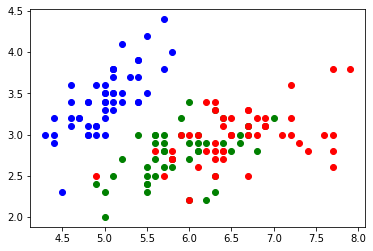

In [3]:
# Lets plot each of the 3 iris types with a different color based on sepal length x width
colors = 'bgr'
for idx,name in enumerate(iris.target_names):

    sepal_length = iris.data[iris.target == idx][:,0] # get sepal length for each flower in the names group
    sepal_width = iris.data[iris.target == idx][:,1]

    plt.scatter(sepal_length, sepal_width, c=colors[idx], label=name)


In [4]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

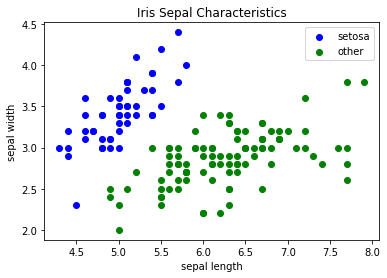

In [5]:
# Divide iris into setosa (target == 0) and not setosa
sepal_length = iris.data[iris.target == 0][:,0]
sepal_width = iris.data[iris.target == 0][:,1]
plt.scatter(sepal_length, sepal_width, c='b', label='setosa')

sepal_length = iris.data[iris.target != 0][:,0]
sepal_width = iris.data[iris.target != 0][:,1]
plt.scatter(sepal_length, sepal_width, c='g', label='other')

plt.title('Iris Sepal Characteristics')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()
plt.show()

# Intro to Perceptrons

Let's say we want to write an artificial intelligence, i.e., a program, that learns out of the given data about sepal length and width, if a given iris flower is an iris setosa or if it is not.

We can do this with a single artificial brain cell, a perceptron. The original paper for Perceptron Learning Algorithm (PLA) is from the 50s.

*"The Perceptron: A Probabilistic Model For Information Storage And Organization in the Brain"* - F. Rosenblatt (December 1958)
http://www.ling.upenn.edu/courses/Fall_2007/cogs501/Rosenblatt1958.pdf

## A perceptron?

A *perceptron* is a neuron with a very simple activation function: a heaviside step function returning binary output.

> hypothetical nervous system, or machine,...

see the above paper. Or, according to the Oxford Dictionary, *perceptron* is a 
> a computer model or computerized machine devised to represent or simulate the ability of the brain to recognize and discriminate.


![](https://appliedgo.net/media/perceptron/neuron.png)



To see what is going on in a perceptron, see the animation at https://appliedgo.net/perceptron/ in the section *Inside an artificial neuron* about.

That is, we can implement an activation function and a perceptron in Python as in the following.

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992]


(-10.0, 9.0, -2.0, 2.0)

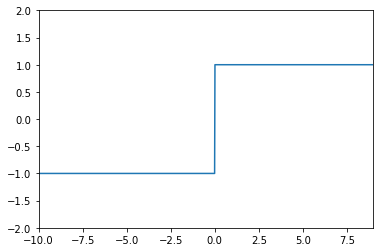

In [6]:
import numpy as np


def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
rnge = np.linspace(-10.0, 10.0, num=1000)
print(rnge[0:5])
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-10, 9, -2, 2])

In [7]:
import numpy as np

def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

1

# Perceptrons for Classification

Using our perceptron, we want to have a program which can *predict* given a pair of sepal length and sepal width if our flower is an iris setosa or not. That is, we want to have a program that says `setosa` (or `1`) for example for `[5.6, 4.8]` or for `[3.4, 4.1]` and it says `other` (or `-1`) for example for `[5.8, 1.9]` or for `[6.2, 2.4]`.   
Note that all those examples are "new" flowers, i.e., we did not observe those value combinations on earlier flowers. Additionally, our program should return the correct class labels for flowers, which we already know from the iris flower dataset.

In [8]:
def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of sepal length and width
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1 for 'setosa' or -1 for 'other'
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction


weights =  [-28.96837525,  48.03329437]


In [9]:
# new flowers
assert predict([5.6, 4.8], weights) == 1
assert predict([3.4, 4.1], weights) == 1
assert predict([5.8, 1.9], weights) == -1
assert predict([6.2, 2.4], weights) == -1

# flowers we already know
assert predict([5.4,  3.9], weights) == 1
assert predict([5.7,  4.4], weights) == 1

In [10]:
predict([5.6, 4.8], weights) == 1

True

## The weights

Given the above program, we could say that we are done, right? The program obviously satisfies the requirements described above. However, the question is where do the weights (`weights =  [-28.96837525, 48.03329437]`) come from? Here, they just magically appeared, but where did they come from?

Actually, they were automatically learned by the program using the ***Perceptron Learning Algorithm (PLA)***, which we are going to implement in the following.

To do so, we need a trainings dataset. We will use the one in which we specified which iris flowers are of type setosa or of another type.

In [11]:
# iris.target and iris.data zipped together and inserted as training data
class_labels = np.copy(iris.target); print('class_labels:',class_labels[40:60])
print('iris.data:',iris.data[40:60]) # each item contains 4 values
class_labels[class_labels != 0] = -1
class_labels[class_labels == 0] = 1
#class_labels[class_labels == -1] = 0

trainings_data = [(d[:2], l) for d, l in zip(iris.data, class_labels)] # get only first 2 values from data
print('Trainings data: \n',trainings_data[:10])

class_labels: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
iris.data: [[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]]
Trainings data: 
 [(array([5.1, 3.5]), 1), (array([4.9, 3. ]), 1), (array([4.7, 3.2]), 1), (array([4.6, 3.1]), 1), (array([5. , 3.6]), 1), (array([5.4, 3.9]), 1), (array([4.6, 3.4]), 1), (array([5. , 3.4]), 1), (array([4.4, 2.9]), 1), (array([4.9, 3.1]), 1)]


In [12]:
from itertools import cycle


def plot_data(data, w_line=None):
    """
    show data in 2d petal length vs width and target being 1 or -1 (indicating if flower is iris setosa or not.)
    Parameters:
    data: array of type tuple(array[petal_height, petal_width], target) target is either 1 or -1
    w_line: a visual line to seperate the 2 clusters. If none is provided it will not show
    """
    # print(data[:10])
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line:                  # only plot a division line if one exists
        l = np.linspace(0, 8.5) # 50 evenly spaced numbers for the x axis
        m, b = w_line           # m = slope, b = intercept
        plt.plot(l, m * l + b, 'y-', lw=2) # lw is line width

    plt.axis([0, 8.5, 0, 5])
    plt.title('Iris Characteristics')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend()


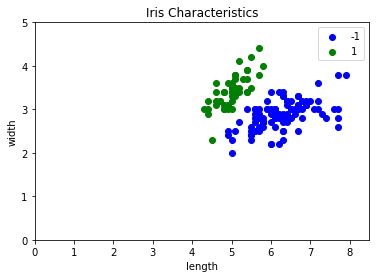

In [13]:
plot_data(trainings_data)

## Perceptron Learning Algorithm (PLA)

Using Stochastic gradient descent. [Further reading here](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python)

In machine learning, we can use a technique that evaluates and updates the weights every iteration called stochastic gradient descent to minimize the error of a model on our training data.

The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

Stochastic gradient descent requires two parameters:
1. Learning Rate: Used to limit the amount each weight is corrected each time it is updated.
2. Epochs: The number of times to run through the training data while updating the weight

In [16]:
import numpy as np
import pdb

def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 
        

learned_weights, weight_history = pla(trainings_data)
# print(weight_history)
print(learned_weights)
print('training data',trainings_data)

[-30.83033042  48.90335594]
training data [(array([5.1, 3.5]), 1), (array([4.9, 3. ]), 1), (array([4.7, 3.2]), 1), (array([4.6, 3.1]), 1), (array([5. , 3.6]), 1), (array([5.4, 3.9]), 1), (array([4.6, 3.4]), 1), (array([5. , 3.4]), 1), (array([4.4, 2.9]), 1), (array([4.9, 3.1]), 1), (array([5.4, 3.7]), 1), (array([4.8, 3.4]), 1), (array([4.8, 3. ]), 1), (array([4.3, 3. ]), 1), (array([5.8, 4. ]), 1), (array([5.7, 4.4]), 1), (array([5.4, 3.9]), 1), (array([5.1, 3.5]), 1), (array([5.7, 3.8]), 1), (array([5.1, 3.8]), 1), (array([5.4, 3.4]), 1), (array([5.1, 3.7]), 1), (array([4.6, 3.6]), 1), (array([5.1, 3.3]), 1), (array([4.8, 3.4]), 1), (array([5., 3.]), 1), (array([5. , 3.4]), 1), (array([5.2, 3.5]), 1), (array([5.2, 3.4]), 1), (array([4.7, 3.2]), 1), (array([4.8, 3.1]), 1), (array([5.4, 3.4]), 1), (array([5.2, 4.1]), 1), (array([5.5, 4.2]), 1), (array([4.9, 3.1]), 1), (array([5. , 3.2]), 1), (array([5.5, 3.5]), 1), (array([4.9, 3.6]), 1), (array([4.4, 3. ]), 1), (array([5.1, 3.4]), 1),

In [ ]:
weight_history

In [ ]:
# new flowers
print(predict([5.6, 4.8], learned_weights))
print(predict([3.4, 4.1], learned_weights))
print(predict([5.8, 1.9], learned_weights))
print(predict([6.2, 2.4], learned_weights))

# flowers we already know
print(predict([5.4, 3.9], learned_weights))
print(predict([5.7, 4.4], learned_weights))

## Exercise: predict iris setosa based on petals rather than sepals

Implement the Perceptron Learning Algorithm (PLA) similarly as demonstrated above for the petal length and petal width. Run predictions on the full dataset using your calculated weights (output from the pla algorithm). How many of the predictions are true?

# What was going on here?

Let's visualize how the weights slice our feature space and how they developed over the iterations... 
We will use weights / norm(weights) to create a (virtual) line descriping the direction of the weight line. The weightline is orthogonal to the division line that we want to illustrate. So we take the weightline from (0,0) to (w1,w2) and calculate the orthogonal line

See [here for details](https://sergedesmedt.github.io/MathOfNeuralNetworks/PerceptronLearningMath.html#learn_perceptron_learningrule_animation)

Intuitively, in a binary problem the weight vector points in the direction of the '1'-class, while the '0 or -1'-class is found when pointing away from the weight vector. The decision boundary should thus be drawn perpendicular to the weight vector.

We do that by finding y-value when x==0 and x-value when y==0.
![](https://www.researchgate.net/profile/Brian_Russell6/publication/254047495/figure/fig2/AS:669439649390595@1536618258079/The-perceptron-decision-boundary-Note-that-either-b-or-w-1-and-w-2-must-be-negative-to.ppm)

And a more [simple explanation](https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38)

In [ ]:

def compute_line(weights):
    """
    Visualizing Linear Separability by using weights/norm(weights) wich are othogonal to the division line.
    Parameters:
    weights: the weights calculated by PLA
    """
    norm = np.linalg.norm(weights) # calculating the frobenius norm adjusting values measured on different scales to a notionally common scale
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    print('slope:',m,'bias',b)
    return m, b


print(compute_line(learned_weights))
plot_data(trainings_data, compute_line(learned_weights))

In the following you see how the weights and thereby the line discriminating our iris flower dataset.

![weights](./images/perceptron_anim.gif)

# We add a bias input...
The [Role of a bias in neural networks](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks)  
See how an artificial neural network (when trained **without a bias**) is bound to the point (0,0,0)

![](https://i.stack.imgur.com/nsDCc.gif)

**With a bias**
![](https://i.stack.imgur.com/7rl1h.gif)

For more details see this [article](https://www.byclb.com/TR/Tutorials/neural_networks/ch8_1.htm)

In [ ]:
import numpy as np

def predict_with_bias(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output. If weights contains an additional value, this must be the bias
    """
    if len(weights)>len(inp):
        bias,weights = weights[-1],weights[:-1]
        sum_bias = np.dot(weights,inp)+bias
        return activation_function(sum_bias)
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

def pla(training_data, no_iterations=50000, w_bias=False, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    
    Parameters:
    training_data: list of vectors, as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    w_bias: boolean to indicate whether to use a bias weight together with the input weights
    """
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1) # an extra bias weight is added to the list of weights
        data = np.array(list(zip(*training_data))[0]) # extract the data from the targets
        
        biases = np.ones((data.shape[0], 1)) # matrix of 150 rows by 1 column of values = 1
        training_data_w_bias = np.append(data, biases, axis=1) # append the biases to the data creating extra column
        training_data = list(zip(training_data_w_bias, list(zip(*training_data))[1])) # adding the target column
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)

# trainings_data is iris_data[:2] (first 2 columns) zipped with target data
learned_weights, weight_history = pla(trainings_data, w_bias=True)
#learned_weights = learned_weights[:2]
print(learned_weights)


#plot_data(trainings_data, compute_line(learned_weights))



In [ ]:
print(predict_with_bias([5.6, 4.8], learned_weights))
print(predict_with_bias([3.4, 4.1], learned_weights))
print(predict_with_bias([5.8, 1.9], learned_weights))
print(predict_with_bias([6.2, 2.4], learned_weights))

# flowers we already know
print(predict_with_bias([5.4, 3.9], learned_weights))
print(predict_with_bias([5.7, 4.4], learned_weights))

In [ ]:
def compute_error_rate(data, model):
    """based on a weight show the error rate 
    as number of wrong predictions relative to all predictions
    
    Parameters:
    data: the training data with input and labels
    model, the weight used in the prediction"""
    
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)
    
    errors = np.array([predict(vec, model) for vec in data_points])
    c_falsy_elements = np.sum(errors != class_labels)
    return c_falsy_elements / len(class_labels)


# Calculate error rates for each weight in the weight history
error_rates = [compute_error_rate(trainings_data, i) for i in weight_history]

plt.plot(error_rates)
plt.show()

## Exercise draw the division line
From the last exercise using 2d data with petal width and length draw the division line based on the calculated weights.